## Dogs Versus Cats

### This is my first attempt at creating a CNN architecture that classifies an image of a dog or a cat.

Tutorial inspired from Chollet's Intro to Keras



The DogVsCat dataset can be downloaded from https://www.kaggle.com/darthmanav/dog-vs-cat-classification-using-cnn

Once imported to your working directory, a seperate folder consisting of training and test images must be made. Furthermore, within both directories, there must be dog and cat directories. This setup helps with the data augmentation implementation.

In [1]:
import os
import shutil

# Define the directory that contains the entire dataset.
original_dataset_dir = '/home/raymond/Documents/Personal_Projects/Neural_Networks/DogsVsCats/dataset'

# We will create the base directory in which we will organize our data to use. 
base_dir = '/home/raymond/Documents/Personal_Projects/Neural_Networks/DogsVsCats/dataset_small'
os.mkdir(base_dir)

# Create the 'train' directory in the base directory.
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# Create the 'validation' directory in the base directory.
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# Create the 'test' directory in the base directory.
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Create the 'cat' directory in the train directory.
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Create the 'dogs' directory in the train directory.
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Create the 'cats' directory in the 'validation' directory.
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Create the 'dogs' directory in the 'validation' directory.
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Create the 'cats' directory in the'test' directory
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Create the 'dogs' directory in the 'test' directory
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# From the original dataset, copy the first 1000 cat images into the 'train' directory
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# From the original dataset, copy the cat images 1000-1500 into the 'validation' directory
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# From the original dataset, copy the cat images 1500-2000 into the 'test' directory
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)

# From the original dataset, copy the first 1000 dog images into the 'train' directory 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# From the original dataset, copy the dog images 1000-1500 into the 'validation' directory
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# From the original dataset, copy the dog images 1500-2000 into the 'validation' directory
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
# Print the total images in each directory
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


## Create the CNN architecture

One can create a neural network using an ordinary dense neural network, meaning without the use of convolutional filters or pooling. CNN's perform better as they focus on segments in an image, and based on a certain collection of them, is able to conclude what class the image belongs too. Dense neural networks pays attention to the entirety of the image as a whole, meaning it globally looks for patterns. Hence CNN is better used for image classification

My model consists of Conv2D and MaxPooling2D layers, that increase in the number of filters. Images are 3 channeled, 150x150, which is the input shape. 
Since there is only 2 classes, we are able to use the sigmoid function in the last layer. 

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.
/home/raymond/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/raymond/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/raymond/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/raymond/anaconda3/lib/python3.7/site-packages/t

/home/raymond/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/raymond/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/raymond/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/raymond/anaconda3/lib/python3.7/site-packages/tensor

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## Compile the model
Binary_crossentropy is used since there are only two classes, and RMSprop is an optimizer that decreases large gradient steps and increases small steps in order to prevent problems such as exploding or vanishing gradients. Learning rate controls the rate in which the the gradient travels to the minima. Our metric for training will be accuracy. 

In [4]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Data Augmentation
This is an important step to prevent overfitting. One of the methods to prevent overfitting includes having a larger dataset, however, the sample we are given is finite. However, we can artificially create more images by skewing, transforming or zooming into the images we have. This allows our model to train on more images in different types of perspectives. For example, a cat isn't going to pose in the same way in every single picture.

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# CNN tends to converge faster if pixel numbers are normalized between 0 and 1.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generator for data augmentation.
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape:  (20,)


# Train the model

We train multiple models to see the effects of dropout and batch normalization.
- Dropout prevents the model from learning off of a specific pattern by zeroing random neurons.
- Batch normalization normalizes the inputs of a layer. 


Model 1 - Without dropout or batch normalization
Model 2 - With Dropout
Model 3 - With Batch normalization

In [7]:
history1 = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_1.h5')


Epoch 1/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6920 - acc: 0.5315 - val_loss: 0.6658 - val_acc: 0.6140
Epoch 2/30
100/100 [==============================] - 10s 95ms/step - loss: 0.6627 - acc: 0.6085 - val_loss: 0.6680 - val_acc: 0.6360
Epoch 3/30
100/100 [==============================] - 9s 95ms/step - loss: 0.6261 - acc: 0.6485 - val_loss: 0.5859 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 9s 95ms/step - loss: 0.5771 - acc: 0.6950 - val_loss: 0.7807 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5403 - acc: 0.7265 - val_loss: 0.6476 - val_acc: 0.6440
Epoch 6/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5130 - acc: 0.7465 - val_loss: 0.5218 - val_acc: 0.6420
Epoch 7/30
100/100 [==============================] - 9s 93ms/step - loss: 0.4879 - acc: 0.7650 - val_loss: 0.4738 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 9s 92ms/ste

## Without Dropout and Batch Normalization

In [8]:
import matplotlib.pyplot as plt

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [9]:

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Dropout(.5))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Dropout(.5))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Dropout(.5))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

## With Dropout

In [10]:
model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [11]:
history2 = model2.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)
model2.save('cats_and_dogs_small_2.h5')

Epoch 1/30
100/100 [==============================] - 11s 108ms/step - loss: 0.7617 - acc: 0.5270 - val_loss: 0.6927 - val_acc: 0.5040
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6951 - acc: 0.5260 - val_loss: 0.6913 - val_acc: 0.4920
Epoch 3/30
100/100 [==============================] - 10s 104ms/step - loss: 0.6903 - acc: 0.5305 - val_loss: 0.6946 - val_acc: 0.5020
Epoch 4/30
100/100 [==============================] - 10s 105ms/step - loss: 0.6918 - acc: 0.5265 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 10s 105ms/step - loss: 0.6857 - acc: 0.5420 - val_loss: 0.6958 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 10s 105ms/step - loss: 0.6866 - acc: 0.5450 - val_loss: 0.6900 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 10s 104ms/step - loss: 0.6815 - acc: 0.5645 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 8/30
100/100 [==============================] - 1

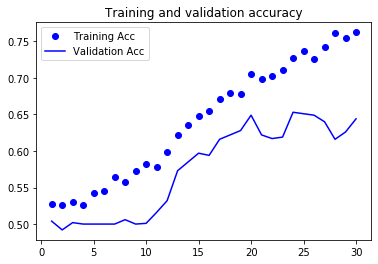

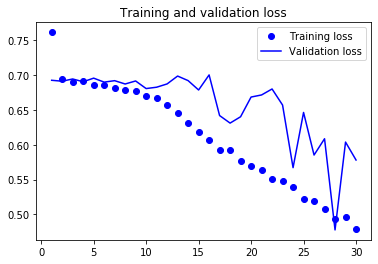

In [12]:

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## With dropout and batch normalization

In [13]:
from keras.layers.normalization import BatchNormalization
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Dropout(.5))
model3.add(BatchNormalization())
model3.add(layers.Conv2D(64, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Dropout(.5))
model3.add(BatchNormalization())
model3.add(layers.Conv2D(128, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Dropout(.5))
model3.add(BatchNormalization())
model3.add(layers.Conv2D(128, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model3.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
history3 = model3.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)
model3.save('cats_and_dogs_small_3.h5')

Epoch 1/30
100/100 [==============================] - 12s 124ms/step - loss: 1.1097 - acc: 0.5280 - val_loss: 0.6486 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 11s 111ms/step - loss: 0.7479 - acc: 0.5705 - val_loss: 0.7470 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 11s 111ms/step - loss: 0.7102 - acc: 0.5765 - val_loss: 0.8567 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6810 - acc: 0.5995 - val_loss: 1.1349 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6663 - acc: 0.6065 - val_loss: 0.8452 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 11s 112ms/step - loss: 0.6567 - acc: 0.6145 - val_loss: 0.9110 - val_acc: 0.5030
Epoch 7/30
100/100 [==============================] - 11s 112ms/step - loss: 0.6399 - acc: 0.6355 - val_loss: 0.7737 - val_acc: 0.5080
Epoch 8/30
100/100 [==============================] - 1

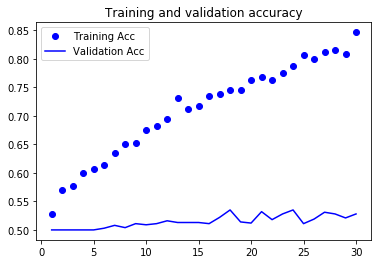

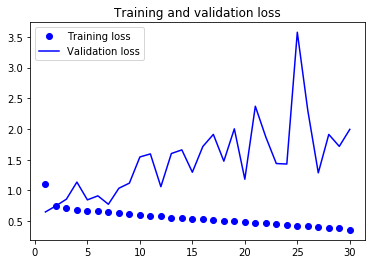

In [16]:

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Conclusion
In the end, batch normalization had a negative effect, and dropout had a lower validaiton accuracy. This could be that the dataset is pretty easy to distinguish in terms of the model's point of view. Perhaps an application that classifies x-rays for specific diseases would benefit from this.
